In [10]:
import pandas as pd
import rdkit
from tqdm import tqdm
from rdkit import Chem
from rdkit import RDLogger       
RDLogger.DisableLog('rdApp.*') 
from random import sample

In [2]:
from multiprocessing import Pool
import numpy as np

def process_smiles_batch(smiles_batch):
    """Traite un batch de SMILES"""
    inchies = []
    for smiles in smiles_batch:
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            inchies.append(Chem.inchi.MolToInchi(mol))
    return inchies

def parallel_process(smiles_series, n_processes=4, batch_size=1000):
    """Traitement parallèle par batches"""
    batches = [smiles_series[i:i+batch_size] 
               for i in range(0, len(smiles_series), batch_size)]
    
    with Pool(n_processes) as pool:
        results = pool.map(process_smiles_batch, batches)
    
    # Aplatir les résultats
    inchies = [inchi for batch_result in results for inchi in batch_result]
    return inchies

In [3]:
import pandas as pd
from rdkit import Chem
import gc

def process_smiles_to_inchi_chunks(smiles_series, chunk_size=1000):
    """Traite les SMILES par petits blocs pour économiser la mémoire"""
    inchies = []
    
    for i in range(0, len(smiles_series), chunk_size):
        chunk = smiles_series.iloc[i:i+chunk_size]
        
        # Convertir le chunk en molécules
        mols = chunk.apply(Chem.MolFromSmiles)
        
        # Convertir en InChI et filtrer les None
        chunk_inchies = [Chem.inchi.MolToInchi(mol) for mol in mols if mol is not None]
        inchies.extend(chunk_inchies)
        
        # Libérer la mémoire
        del mols, chunk_inchies
        gc.collect()
        
        if i % (chunk_size * 10) == 0:
            print(f"Traité {i}/{len(smiles_series)} SMILES")
    
    return inchies


In [11]:

# Utilisation
moses_can_cl = pd.read_csv("../data/generated/moses_canonical_CL_1.csv")["SMILES"]
moses_inchiescan_cl = process_smiles_to_inchi_chunks(moses_can_cl)

Traité 0/10000 SMILES


In [ ]:

moses_clearsmi_cl = pd.read_csv("../data/generated/moses_ClearSMILES_CL_1.csv")["SMILES"]



In [14]:
moses_training_data = pd.read_csv("../data/training_data/moses_canonical.csv")
moses_training_data = moses_training_data[moses_training_data["SPLIT"]=='train']["SMILES"]

In [6]:
clearsmi_lat15 = pd.read_parquet("../data/raw/samples_100_100_sampled_ClearSMILES_lat_15.parquet")["can_smiles"]
clearsmi_lat22 = pd.read_parquet("../data/raw/samples_100_100_sampled_ClearSMILES_lat_22.parquet")["can_smiles"]


In [4]:
moses_benchmark = pd.read_csv("../reports/data/BENCHMARK/BENCHMARK_can_smiles_moses_CL.csv")

In [5]:
moses_benchmark.describe()

,valid,unique@1000,unique@10000,FCD/Test,SNN/Test,Frag/Test,Scaf/Test,FCD/TestSF,SNN/TestSF,Frag/TestSF,Scaf/TestSF,IntDiv,IntDiv2,Filters,logP,SA,QED,weight,Novelty,sample length
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,0.993642,0.999968,0.999052,0.150272,0.633503,0.999575,0.874174,0.633438,0.583979,0.998017,0.057957,0.855693,0.849563,0.998204,0.023174,0.007817,0.001262,2.731326,0.720816,10161.161290
std,0.000790,0.000180,0.000273,0.009181,0.001221,0.000060,0.008090,0.020091,0.000796,0.000218,0.007879,0.000372,0.000353,0.000387,0.003953,0.002805,0.000396,0.303489,0.004706,898.050559
min,0.992200,0.999000,0.998591,0.109352,0.631030,0.999444,0.861337,0.592658,0.581941,0.997511,0.045198,0.855022,0.848938,0.997582,0.016864,0.003898,0.000596,2.158175,0.711782,9998.000000
25%,0.993050,1.000000,0.998843,0.147527,0.632688,0.999531,0.870495,0.624500,0.583406,0.997862,0.052451,0.855370,0.849245,0.997885,0.020022,0.005376,0.001013,2.486473,0.717265,10000.000000
50%,0.993699,1.000000,0.998994,0.151272,0.633550,0.999585,0.873431,0.637880,0.583989,0.998019,0.057594,0.855719,0.849600,0.998189,0.023921,0.007595,0.001271,2.736587,0.720940,10000.000000
75%,0.994300,1.000000,0.999247,0.155074,0.634155,0.999609,0.876018,0.644168,0.584547,0.998199,0.063630,0.856014,0.849855,0.998540,0.025339,0.009317,0.001531,2.922193,0.724277,10000.000000
max,0.994900,1.000000,0.999497,0.161433,0.636029,0.999732,0.910442,0.675838,0.585680,0.998366,0.074481,0.856216,0.850099,0.998993,0.034598,0.014741,0.002484,3.547509,0.730416,15000.000000


In [7]:
clearsmi_lat22

0                 COc1ccc(N2CCC(Cc3ccccc3F)C2=O)cn1
1               CNC(=O)C1(CC(=O)N2CCC(C)CC(C)C2)CC1
2         CCc1sc2c(c1C#N)C(CNC(=O)NCCC(C)C)CC(=O)N2
3         Cc1cc(NC(=O)CN(C)C(C)c2ccco2)nc(SC(C)C)n1
4                        CC1COc2cc(F)c(N)cc2C(=O)C1
                            ...                    
299995             CC1(N2CCC(C(=O)NC3CCCC3)CC2)CCC1
299996               CC(C)c1cccc(COC(=O)C2CCCCC2)c1
299997       CC(=O)Nc1cc(C)c(CNC(=O)Nc2ccsc2)c(C)c1
299998    CCSc1nnc(N)n1CCC(=O)Nc1ccc2nc(C3CC3)oc2c1
299999         O=C1CC(Cc2nccs2)CC(=O)N(Cc2ccccc2)N1
Name: can_smiles, Length: 300000, dtype: object

In [9]:
for k in range(30):
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    df1["SMILES"] = clearsmi_lat22[10000*k:10000*(k+1)]
    df2["SMILES"] = clearsmi_lat15[10000*k:10000*(k+1)]
    df1.to_csv("../data/processed/sample_VAE/VAE_latent22_"+str(k)+".csv")
    df2.to_csv("../data/processed/sample_VAE/VAE_latent15_"+str(k)+".csv")

In [ ]:


df = pd.DataFrame()
df["SMILES"] = clearsmi_lat22[:30000]
df.to_csv("../data/processed/sample_VAE/VAE_latent22.csv")

df = pd.DataFrame()
df["SMILES"] = clearsmi_lat15[:30000]
df.to_csv("../data/processed/sample_VAE/VAE_latent15.csv")

In [15]:
clearsmi_lat15 = sample(clearsmi_lat15.to_list(),30000)
clearsmi_lat22 = sample(clearsmi_lat22.to_list(),30000)

In [17]:
clearsmi_lat15 = pd.Series([k for k in clearsmi_lat15 if isinstance(k,str)])
clearsmi_lat22 = pd.Series([k for k in clearsmi_lat22 if isinstance(k,str)])

len(clearsmi_lat22)
len(clearsmi_lat15)

30000

In [18]:
inchies_lat15 =  process_smiles_to_inchi_chunks(clearsmi_lat15)
inchies_lat22 =  process_smiles_to_inchi_chunks(clearsmi_lat22)

Traité 0/30000 SMILES
Traité 10000/30000 SMILES
Traité 20000/30000 SMILES
Traité 0/30000 SMILES
Traité 10000/30000 SMILES
Traité 20000/30000 SMILES


In [5]:

moses_inchies_clearsmi_cl = process_smiles_to_inchi_chunks(moses_clearsmi_cl)



[16:32:14] SMILES Parse Error: extra close parentheses while parsing: CC1SC=C(N=1)C(=O)NC(C)C1C=NN(C)C=1C)C1C=CC(F)=CC=1
[16:32:14] SMILES Parse Error: check for mistakes around position 36:
[16:32:14] O)NC(C)C1C=NN(C)C=1C)C1C=CC(F)=CC=1
[16:32:14] ~~~~~~~~~~~~~~~~~~~~^
[16:32:14] SMILES Parse Error: Failed parsing SMILES 'CC1SC=C(N=1)C(=O)NC(C)C1C=NN(C)C=1C)C1C=CC(F)=CC=1' for input: 'CC1SC=C(N=1)C(=O)NC(C)C1C=NN(C)C=1C)C1C=CC(F)=CC=1'
[16:32:14] SMILES Parse Error: extra close parentheses while parsing: C1N(C)N=CC=1CNC(=O)NC1=CN=CC=C1C)N1CCCC1
[16:32:14] SMILES Parse Error: check for mistakes around position 33:
[16:32:14] CNC(=O)NC1=CN=CC=C1C)N1CCCC1
[16:32:14] ~~~~~~~~~~~~~~~~~~~~^
[16:32:14] SMILES Parse Error: Failed parsing SMILES 'C1N(C)N=CC=1CNC(=O)NC1=CN=CC=C1C)N1CCCC1' for input: 'C1N(C)N=CC=1CNC(=O)NC1=CN=CC=C1C)N1CCCC1'
[16:32:14] Explicit valence for atom # 24 Cl, 2, is greater than permitted
[16:32:14] SMILES Parse Error: extra close parentheses while parsing: N1=NN=CN1C

Traité 0/10000 SMILES


[16:32:14] SMILES Parse Error: extra close parentheses while parsing: F1C=CC=CC=1CN1CCSC2C1=CC(N)=CC=2)=O
[16:32:14] SMILES Parse Error: check for mistakes around position 33:
[16:32:14] N1CCSC2C1=CC(N)=CC=2)=O
[16:32:14] ~~~~~~~~~~~~~~~~~~~~^
[16:32:14] SMILES Parse Error: Failed parsing SMILES 'F1C=CC=CC=1CN1CCSC2C1=CC(N)=CC=2)=O' for input: 'F1C=CC=CC=1CN1CCSC2C1=CC(N)=CC=2)=O'
[16:32:14] SMILES Parse Error: extra close parentheses while parsing: CC1CCCC(C)N1C(=O)NC1=CC=CC=C1OC(F)C)C(OC)=O
[16:32:14] SMILES Parse Error: check for mistakes around position 36:
[16:32:14] O)NC1=CC=CC=C1OC(F)C)C(OC)=O
[16:32:14] ~~~~~~~~~~~~~~~~~~~~^
[16:32:14] SMILES Parse Error: Failed parsing SMILES 'CC1CCCC(C)N1C(=O)NC1=CC=CC=C1OC(F)C)C(OC)=O' for input: 'CC1CCCC(C)N1C(=O)NC1=CC=CC=C1OC(F)C)C(OC)=O'
[16:32:14] SMILES Parse Error: extra close parentheses while parsing: N1C=CC=C1CC(=O)NCC1=CC=CN=C1)OC1CCCC1
[16:32:14] SMILES Parse Error: check for mistakes around position 29:
[16:32:14] 1CC(=O)NCC1=CC

In [19]:

moses_inchies_training = process_smiles_to_inchi_chunks(moses_training_data)

Traité 0/1584663 SMILES
Traité 10000/1584663 SMILES
Traité 20000/1584663 SMILES
Traité 30000/1584663 SMILES
Traité 40000/1584663 SMILES
Traité 50000/1584663 SMILES
Traité 60000/1584663 SMILES
Traité 70000/1584663 SMILES
Traité 80000/1584663 SMILES
Traité 90000/1584663 SMILES
Traité 100000/1584663 SMILES
Traité 110000/1584663 SMILES
Traité 120000/1584663 SMILES
Traité 130000/1584663 SMILES
Traité 140000/1584663 SMILES
Traité 150000/1584663 SMILES
Traité 160000/1584663 SMILES
Traité 170000/1584663 SMILES
Traité 180000/1584663 SMILES
Traité 190000/1584663 SMILES
Traité 200000/1584663 SMILES
Traité 210000/1584663 SMILES
Traité 220000/1584663 SMILES
Traité 230000/1584663 SMILES
Traité 240000/1584663 SMILES
Traité 250000/1584663 SMILES
Traité 260000/1584663 SMILES
Traité 270000/1584663 SMILES
Traité 280000/1584663 SMILES
Traité 290000/1584663 SMILES
Traité 300000/1584663 SMILES
Traité 310000/1584663 SMILES
Traité 320000/1584663 SMILES
Traité 330000/1584663 SMILES
Traité 340000/1584663 SMILES

In [20]:
inchies_lat15_new = [k for k in tqdm(inchies_lat15) if k not in moses_inchies_training]
inchies_lat22_new = [k for k in tqdm(inchies_lat22) if k not in moses_inchies_training]

100%|██████████| 30000/30000 [16:06<00:00, 31.03it/s]


In [42]:
print(len(inchies_lat15_new))
print(len(inchies_lat22_new))

29848
29730


In [21]:
smiles_lat22_new = []
for k in inchies_lat22_new:    
    if Chem.inchi.MolFromInchi(k):
        smiles_lat22_new.append(Chem.MolToSmiles(Chem.inchi.MolFromInchi(k)) )
print(len(smiles_lat22_new))
smiles_lat15_new = []
for k in inchies_lat15_new:    
    if Chem.inchi.MolFromInchi(k):
        smiles_lat15_new.append(Chem.MolToSmiles(Chem.inchi.MolFromInchi(k)) )
print(len(smiles_lat15_new))

29131
28839


In [22]:
df = pd.DataFrame()
df["SMILES"] = smiles_lat22_new
df.to_csv("../data/processed/sample_VAE/onlynew_VAE_latent22_2.csv")

df = pd.DataFrame()
df["SMILES"] = smiles_lat15_new
df.to_csv("../data/processed/sample_VAE/onlynew_VAE_latent15_2.csv")

In [46]:
smiles_lat22 = []
for k in inchies_lat22[:30000]:    
    if Chem.inchi.MolFromInchi(k):
        smiles_lat22.append(Chem.MolToSmiles(Chem.inchi.MolFromInchi(k)) )

smiles_lat15 = []
for k in inchies_lat15[:30000]:    
    if Chem.inchi.MolFromInchi(k):
        smiles_lat15.append(Chem.MolToSmiles(Chem.inchi.MolFromInchi(k)) )
len(smiles_lat15)

df = pd.DataFrame()
df["SMILES"] = smiles_lat22
df.to_csv("../data/processed/sample_VAE/VAE_latent22.csv")

df = pd.DataFrame()
df["SMILES"] = smiles_lat15
df.to_csv("../data/processed/sample_VAE/VAE_latent15.csv")

In [15]:
len(moses_molcan_cl)

10000

In [17]:
len([Chem.inchi.MolToInchi(k) for k in moses_molcan_cl if k])

[16:40:24] WARNING: Omitted undefined stereo

[16:40:24] WARNING: Omitted undefined stereo

[16:40:24] WARNING: Omitted undefined stereo

[16:40:24] WARNING: Omitted undefined stereo

[16:40:24] WARNING: Omitted undefined stereo

[16:40:24] WARNING: Omitted undefined stereo

[16:40:24] WARNING: Omitted undefined stereo

[16:40:24] WARNING: Omitted undefined stereo

[16:40:24] WARNING: Omitted undefined stereo

[16:40:24] WARNING: Omitted undefined stereo

[16:40:24] WARNING: Omitted undefined stereo

[16:40:24] WARNING: Omitted undefined stereo

[16:40:24] WARNING: Omitted undefined stereo

[16:40:24] WARNING: Omitted undefined stereo

[16:40:24] WARNING: Omitted undefined stereo

[16:40:24] WARNING: Omitted undefined stereo

[16:40:24] WARNING: Omitted undefined stereo

[16:40:24] WARNING: Omitted undefined stereo

[16:40:24] WARNING: Omitted undefined stereo

[16:40:24] WARNING: Omitted undefined stereo

[16:40:24] WARNING: Omitted undefined stereo

[16:40:24] WARNING: Omitted undefi

9328

AttributeError: 'list' object has no attribute 'apply'

In [10]:
moses_inchiescan_cl = [k for k in moses_inchiescan_cl if k not in moses_inchies_training]
moses_inchiescleasmi_cl = [k for k in moses_inchiescleasmi_cl if k not in moses_inchies_training]

In [12]:
len(moses_inchiescan_cl)

0

In [23]:
import pandas as pd

pd.read_csv("../reports/data/BENCHMARK/BENCHMARK_VAE.csv")

,valid,unique@1000,unique@10000,FCD/Test,SNN/Test,Frag/Test,Scaf/Test,FCD/TestSF,SNN/TestSF,Frag/TestSF,...,IntDiv,IntDiv2,Filters,logP,SA,QED,weight,Novelty,model_name,sample length
0,1.0,1.0,1.0,4.318204,0.406940,0.874143,0.485547,4.648495,0.398849,0.878034,...,0.874820,0.869362,0.932700,0.295238,0.624186,0.122682,7.185806,1.000000,Etienne_VAE_latent_22_onlynew,29138
1,1.0,1.0,1.0,4.973939,0.395552,0.814882,0.419283,5.271989,0.388033,0.818561,...,0.879730,0.874504,0.935657,0.282994,0.730160,0.127542,7.084530,1.000000,Etienne_VAE_latent_15_onlynew,28861
2,1.0,1.0,1.0,2.265182,0.436746,0.981419,0.478870,2.548466,0.426151,0.979105,...,0.871674,0.866254,0.967400,0.339893,0.495079,0.045608,7.073844,0.995100,Etienne_VAE_latent_15,29013
3,1.0,1.0,1.0,1.474749,0.461992,1.000000,0.757393,1.787386,0.449786,1.000000,...,0.864358,0.858953,0.966982,0.245528,0.339776,0.022928,7.262217,0.990886,Etienne_VAE_latent_22,29408
4,1.0,1.0,1.0,4.271516,0.407088,0.878223,0.514705,4.589854,0.398642,0.882092,...,0.874834,0.869367,0.934022,0.296055,0.631202,0.121919,7.097682,1.000000,Etienne_VAE_latent_22_onlynew_2,29131
5,1.0,1.0,1.0,4.956840,0.396275,0.820336,0.424597,5.242778,0.388461,0.824203,...,0.879350,0.874157,0.937515,0.276435,0.726810,0.126694,7.204273,1.000000,Etienne_VAE_latent_15_onlynew_2,28839


In [15]:
for i in moses_training_data:
    if Chem.MolFromSmiles(i):
        Chem.MolFromSmiles(i)
        break

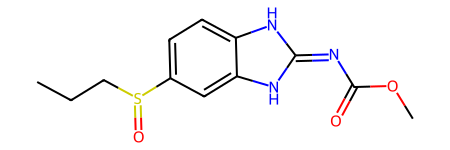

In [16]:
Chem.MolFromSmiles(i)

In [17]:
print(i)

CCCS(=O)c1ccc2[nH]c(=NC(=O)OC)[nH]c2c1


In [21]:
smiles = "C1CCCCC1"
smiles

'C1CCCCC1'

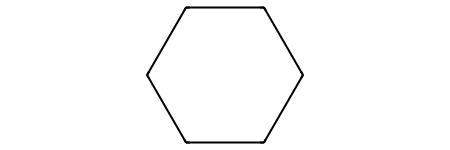

In [22]:
Chem.MolFromSmiles(smiles)